In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Import the dataset
data = pd.read_csv(r"D:\kaggle\cancer data\data.csv")

data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [49]:
# Drop the column named 'Unnamed: 32' if it exists
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])

# Check for null values and data types
print("Null values in each column:\n", data.isnull().sum())
print("\nData types of each column:\n", data.dtypes)

Null values in each column:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Data types of each column:
 i

In [50]:
# Perform label encoding for object types
object_cols = data.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    le = LabelEncoder()
    for col in object_cols:
        data[col] = le.fit_transform(data[col])
    print("\nLabel encoding applied to columns:", object_cols)


Label encoding applied to columns: Index(['diagnosis'], dtype='object')


In [51]:
# Verify and print column names
print("\nAvailable columns:\n", data.columns)



Available columns:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


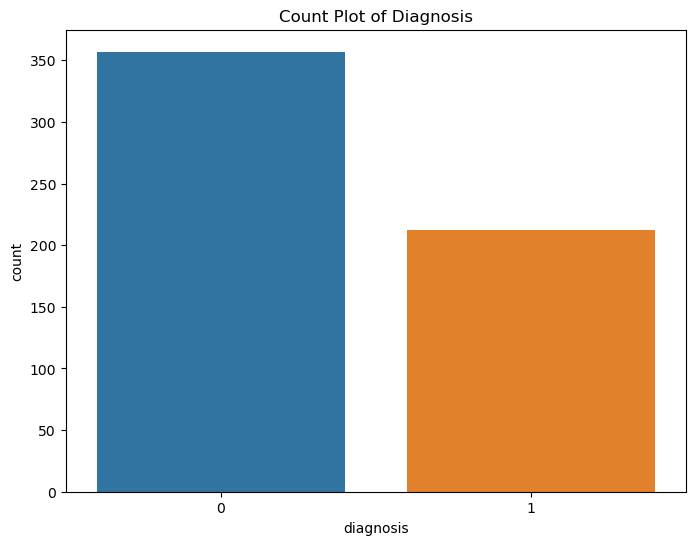

In [52]:
# Create count plot for the 'diagnosis' column
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data)
plt.title('Count Plot of Diagnosis')
plt.show()

D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


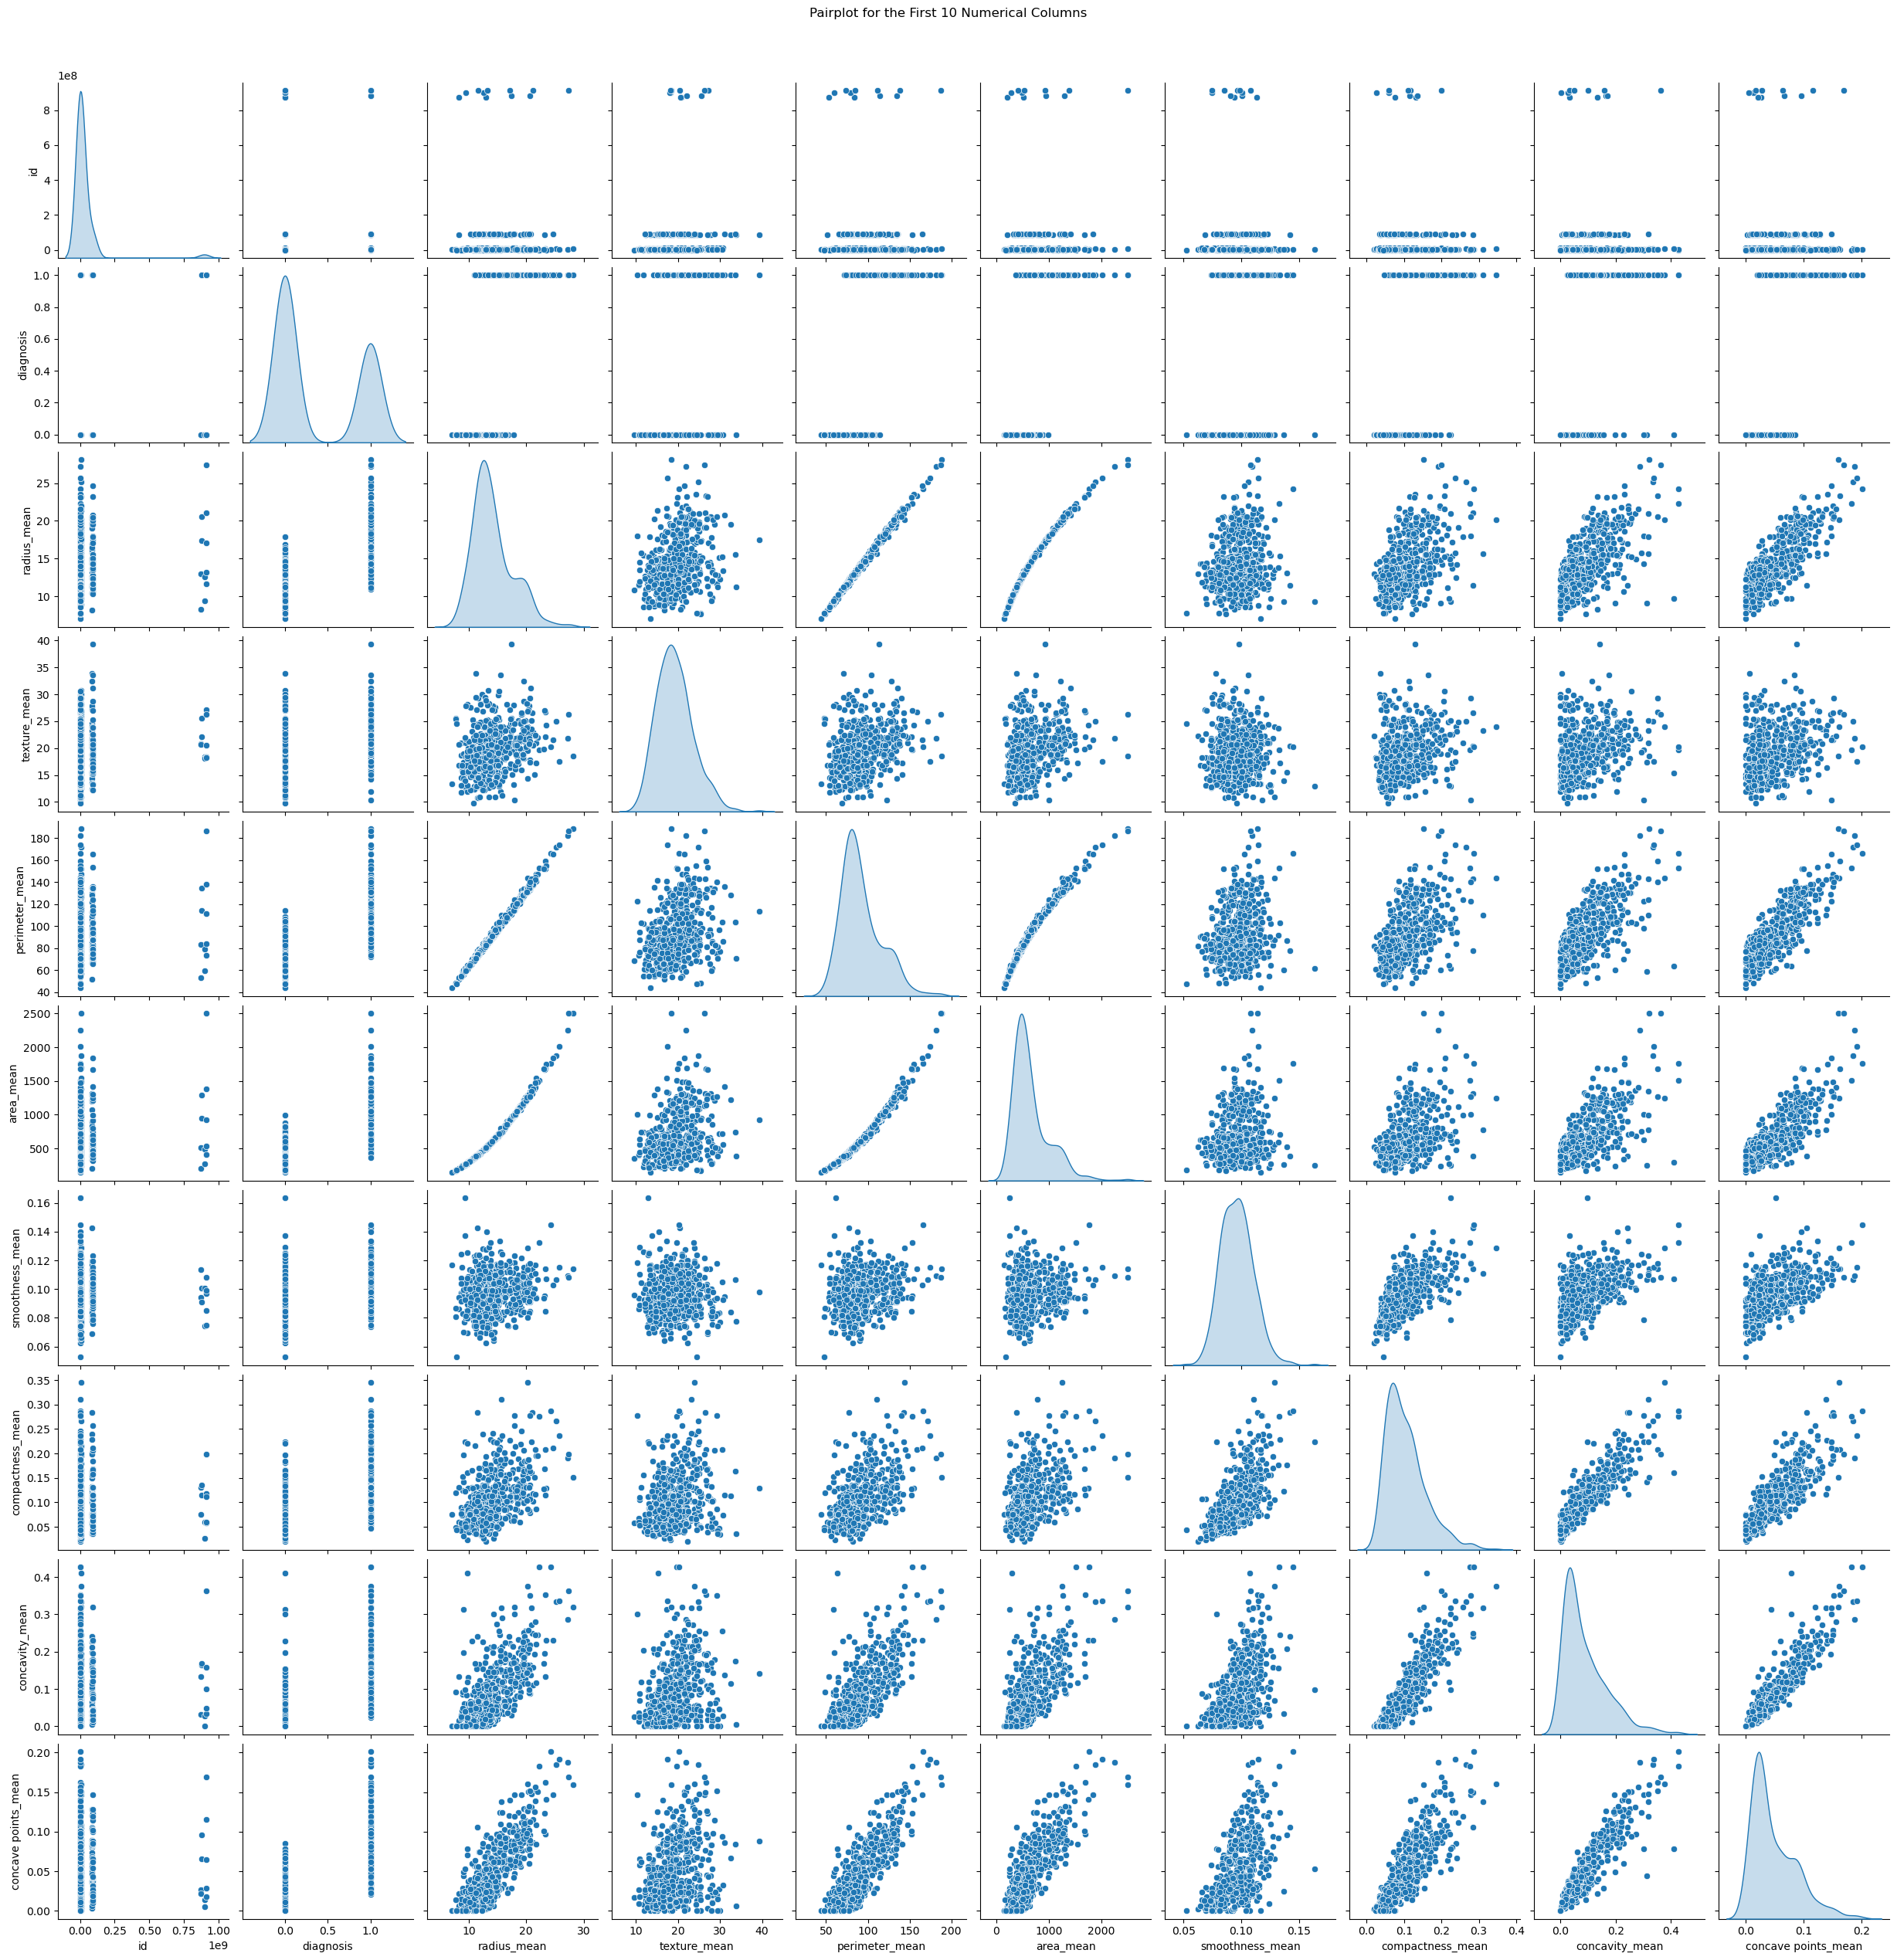

In [53]:
# Create pair plot for the first 10 numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns
if len(num_cols) > 1:
    sns.pairplot(data[num_cols[:10]], diag_kind="kde")
    plt.suptitle('Pairplot for the First 10 Numerical Columns', y=1.02)
    plt.show()
else:
    print("Not enough numerical columns to create a pair plot.")

In [54]:
# Prepare the data for training and testing
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


In [55]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [57]:
# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.06
R^2 Score: 0.73


In [59]:
# Calculate the regression formula
slope = lin_reg.coef_[features.index(feature)]
intercept = lin_reg.intercept_
formula = f'Y = {slope:.2f}X + {intercept:.2f}'

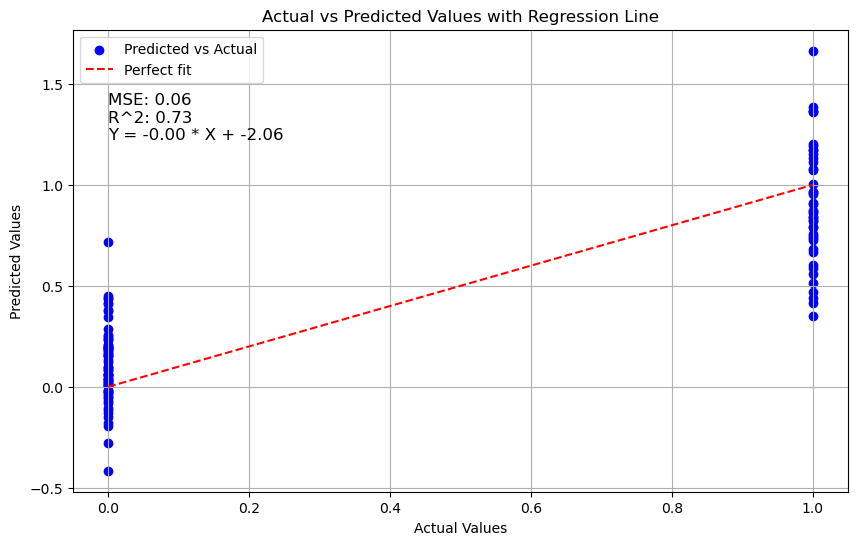

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect fit')


# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')

# Add formula text
formula = f'Y = {slope:.2f} * X + {intercept:.2f}'
plt.text(
    y_test.min(), 
    y_pred.max() - (y_pred.max() - y_pred.min()) * 0.1,  # Position the text slightly above the bottom
    f'MSE: {mean_squared_error(y_test, y_pred):.2f}\nR^2: {r2_score(y_test, y_pred):.2f}\n{formula}',
    fontsize=12,
    color='black',
    ha='left',  # Horizontal alignment (left, center, right)
    va='top'    # Vertical alignment (top, center, bottom)
)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
